<a href="https://colab.research.google.com/github/sac-1999/CNN-Architectures/blob/main/Le_Net_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from  tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0

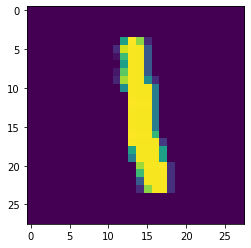

In [ ]:
def show_sample_image (image):
  plt.imshow(image)

show_sample_image(train_x[6])

In [ ]:
(m,h,w) = train_x.shape
# Here we can see that there are 60k images in trainig dataset which are of 28 X 28 dimension.

In [ ]:
train_x = tf.expand_dims(train_x, 3)
train_x = tf.image.resize(train_x, (32,32))
test_x = tf.expand_dims(test_x, 3)
test_x = tf.image.resize(test_x, (32,32))

train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)





In [ ]:
train_x.shape

TensorShape([60000, 32, 32, 1])

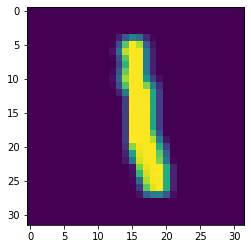

In [ ]:
## showing resized image
show_sample_image(train_x.numpy().squeeze()[6])

In [ ]:
### Le Net - 5 Architecture

# Conv1 layer

input = tf.keras.Input(shape = (32,32,1))
A1 = layers.Conv2D(6,5, activation = 'tanh')(input)

# Pooling layer

P1 = layers.AveragePooling2D(pool_size = (2,2), strides = 2)(A1)

# Conv2 D layer

A2 = layers.Conv2D(16, 5, activation = 'tanh')(P1)

# Pooling layer

P2 = layers.AveragePooling2D(pool_size = (2,2), strides = 2)(A2)

F1 = layers.Flatten()(P2)

D1 = layers.Dense(120, activation='tanh')(F1)

D2 = layers.Dense(84, activation='tanh')(D1)

output = layers.Dense(10, activation='softmax')(D2)

le_net_5_model = tf.keras.Model(inputs=input, outputs=output)


In [ ]:
le_net_5_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               4812

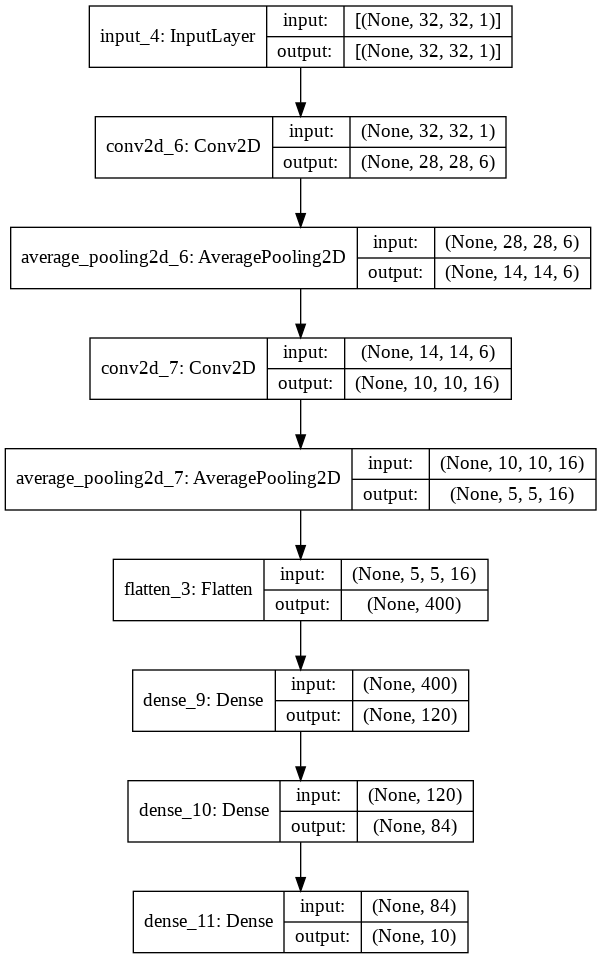

In [ ]:
tf.keras.utils.plot_model(le_net_5_model, "le_net_5_model.png",show_shapes=True)

In [ ]:
le_net_5_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
fit_history = le_net_5_model.fit(x = train_x, y = train_y, epochs = 10,batch_size = 64, verbose = 2, validation_data = (test_x, test_y))

Epoch 1/10
938/938 - 31s - loss: 0.2659 - accuracy: 0.9230 - val_loss: 0.1190 - val_accuracy: 0.9639
Epoch 2/10
938/938 - 30s - loss: 0.0998 - accuracy: 0.9698 - val_loss: 0.0766 - val_accuracy: 0.9776
Epoch 3/10
938/938 - 30s - loss: 0.0656 - accuracy: 0.9801 - val_loss: 0.0626 - val_accuracy: 0.9799
Epoch 4/10
938/938 - 30s - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0589 - val_accuracy: 0.9809
Epoch 5/10
938/938 - 30s - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0497 - val_accuracy: 0.9827
Epoch 6/10
938/938 - 30s - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0522 - val_accuracy: 0.9827
Epoch 7/10
938/938 - 30s - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0487 - val_accuracy: 0.9843
Epoch 8/10
938/938 - 30s - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0515 - val_accuracy: 0.9855
Epoch 9/10
938/938 - 30s - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0540 - val_accuracy: 0.9832
Epoch 10/10
938/938 - 30s - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0521 - val_accura

In [ ]:
loss = fit_history.history['loss']
accuracy = fit_history.history['val_accuracy']

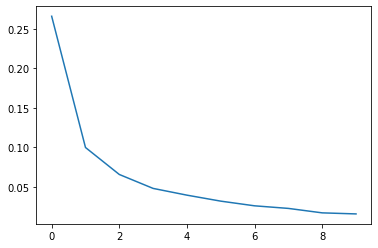

In [ ]:
fig,ax = plt.subplots()
ax.plot(loss)


In [ ]:
pred = le_net_5_model.predict(test_x[:20])
final = []

In [ ]:
for i in pred:
  final.append(np.argmax(i))

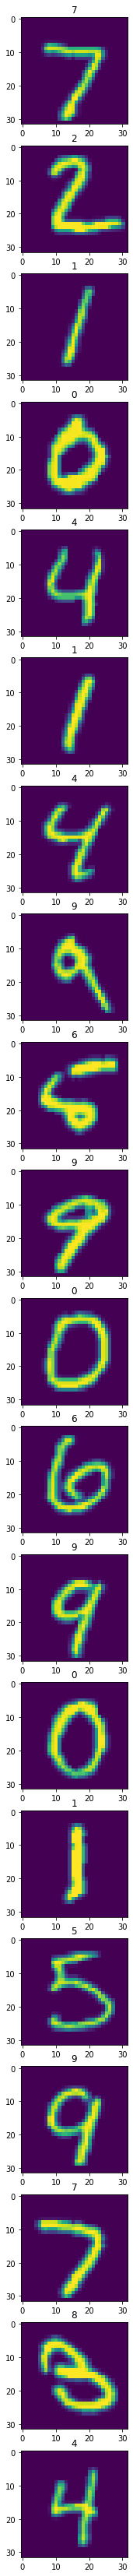

In [ ]:
fig,ax = plt.subplots(20, figsize = (100,60))
for i in range(20):
  ax[i].imshow(test_x[i].numpy().squeeze())
  ax[i].set_title(final[i])
  